# RAMP: Unveiling Energy Landscapes: Exploring Energy Performance Diagnosis (DPE) in Paris Before July 2021
*AGUDELO Julian, BAROUDI Malek,KASSARA Nada, PONCE Afonso, ROUSSEAU Paul, VERLYNDE Matthieu*
<div>
    <table style="width:100%; background-color:transparent;">
        <tr style="background-color:transparent;">
            <td align="left" style="background-color:transparent; width: 40%;">
                <a href="https://www.agroparistech.fr/">
                    <img src="https://www.aptalumni.org/images/news/apt-logo-sloganfranc-ais-rvb-positif-002.png" alt="Texte alternatif" width="450px" />
                </a>
            </td>
            <td align="right" style="background-color:transparent; width: 40%;">
                <a href="https://www.geops.universite-paris-saclay.fr/">
                    <img src="https://i.pinimg.com/originals/4c/60/61/4c6061817fe38c9cf17cd55c4f9e1a55.png" alt="Texte alternatif" width="450px" />
                </a>
            </td>
        </tr>
    </table>
</div>



## Table of Contents
* [Introduction](#introduction)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Requirements](#requirements)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)


## Introduction to the Energy Performance Diagnosis (DPE) - Paris (Before July 2021)<a class="anchor" id="introduction"></a>

The Energy Performance Diagnosis (DPE) serves as a comprehensive tool for assessing the energy performance of residences and buildings, providing insights into their energy consumption and environmental impact in terms of greenhouse gas emissions.

The establishment of DPE is subject to regulated content and procedures. This diagnostic meticulously outlines the characteristics of the building or dwelling, encompassing details such as surface area, orientation, walls, windows, materials, and more. Additionally, it encompasses an evaluation of heating systems, hot water production, cooling, and ventilation equipment. Depending on the scenario, the DPE indicates either the actual energy consumption based on invoices or the estimated energy consumption for standardized usage of the building or dwelling.

Facilitating the interpretation of DPE information are two labels, each classified into seven classes ranging from A to G, where A represents the highest performance and G the lowest:

1. **Energy Label:** Provides insights into primary energy consumption.
2. **Climate Label:** Reveals the quantity of greenhouse gases emitted.

Crucially, the Diagnostic de Performance Énergétique must be conducted by an independent professional meeting specific competency criteria and holding adequate insurance. This regulatory framework ensures the reliability and accuracy of the assessment.

By delving into the DPE of residences in Paris, specifically before July 2021, we gain a nuanced understanding of the energy landscape in this dynamic urban environment. This introduction sets the stage for exploring the implications and applications of DPE data in enhancing energy efficiency and sustainability practices within the context of the vibrant city of Paris.

## The dataset <a class="anchor" id="dataset"></a>

desciprption of the dataset *****

## Requirements <a class="anchor" id="requirements"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/tmp/ipykernel_71428/1178242339.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Download Data

In [2]:
# Uncomment the following line to download data:
#!python download_data.py

## Data Exploration <a class="anchor" id="exploration"></a>

### Training data 

In [23]:
train = pd.read_csv('data/public/train.csv')
test = pd.read_csv('data/public/test.csv')
# put train and test together
df = pd.concat([train, test])

/tmp/ipykernel_71428/3645239315.py:1: DtypeWarning: Columns (23,24,25,39) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data/public/train.csv')
/tmp/ipykernel_71428/3645239315.py:2: DtypeWarning: Columns (36,39) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('data/public/test.csv')


<Axes: >

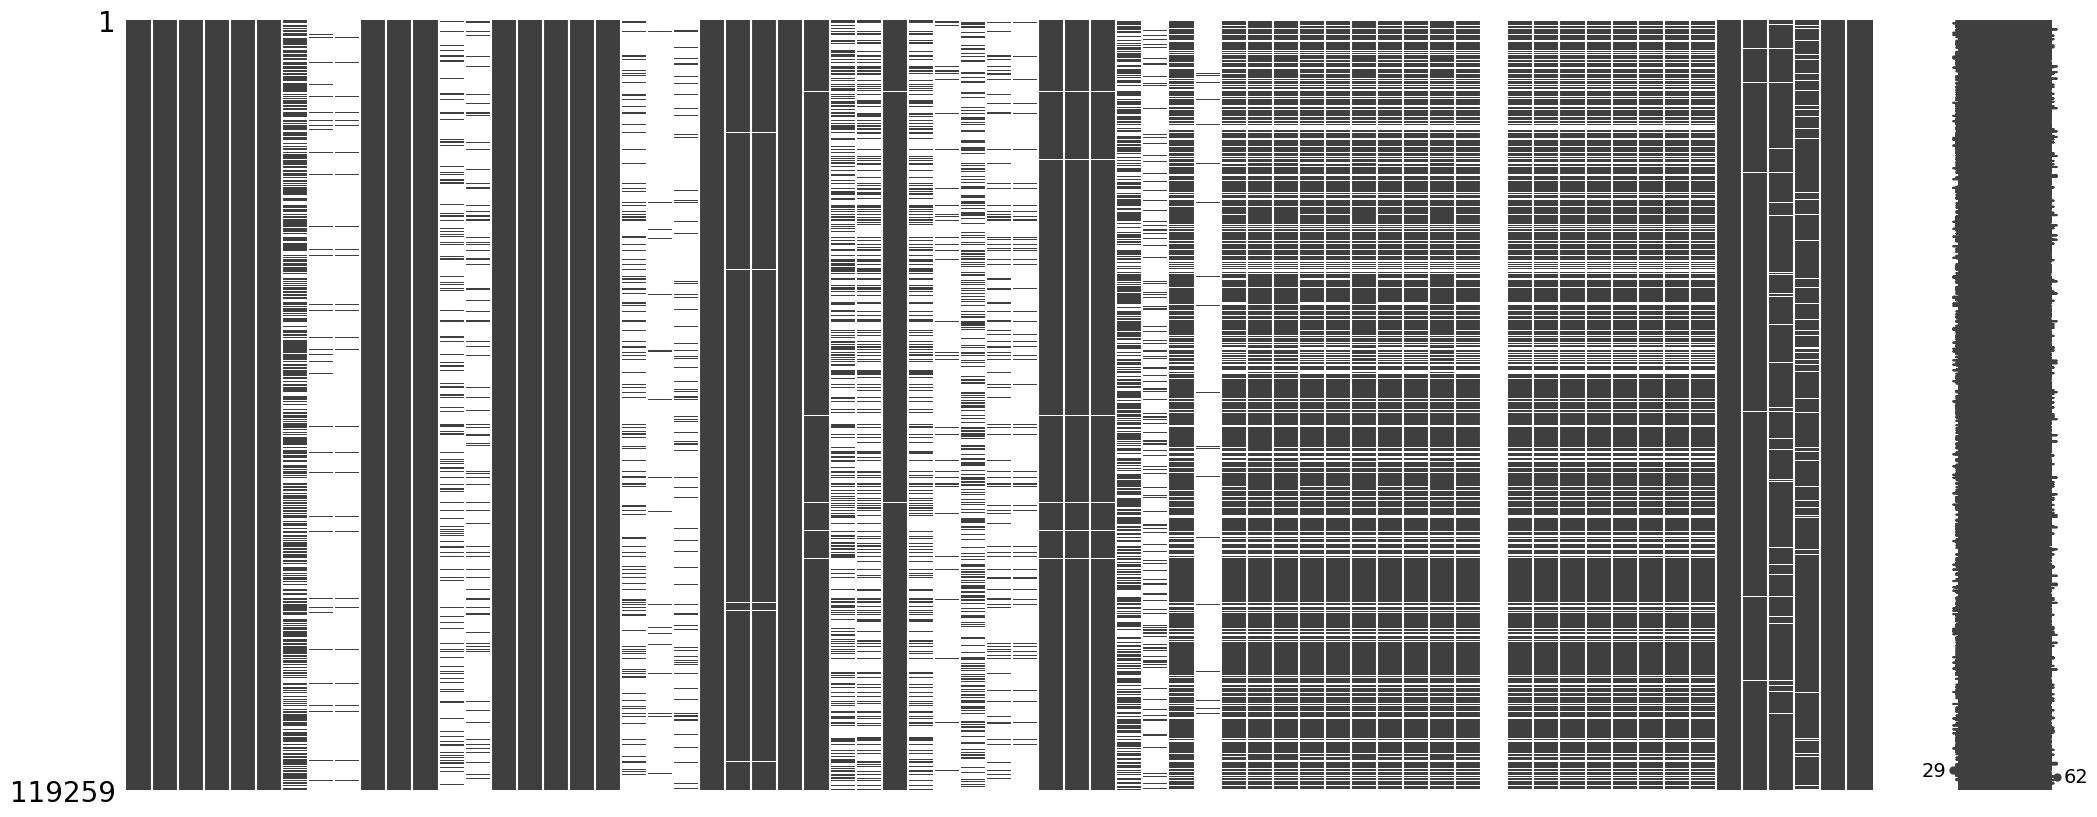

In [24]:
# Missingness
msno.matrix(df)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124461 entries, 0 to 37375
Data columns (total 67 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              124459 non-null  object 
 1   numero_dpe                                      121614 non-null  object 
 2   usr_diagnostiqueur_id                           122594 non-null  object 
 3   usr_logiciel_id                                 122584 non-null  object 
 4   tr001_modele_dpe_id                             120812 non-null  object 
 5   nom_methode_dpe                                 120781 non-null  object 
 6   version_methode_dpe                             76085 non-null   object 
 7   nom_methode_etude_thermique                     6720 non-null    object 
 8   version_methode_etude_thermique                 5938 non-null    object 
 9   date_visite_diagnostiqueur      

In [26]:
print(df.isnull().sum())

id                                    0
numero_dpe                            0
usr_diagnostiqueur_id                 0
usr_logiciel_id                       0
tr001_modele_dpe_id                   0
                                   ... 
organisme_certificateur            1120
adresse_organisme_certificateur    4584
dpe_vierge                         6828
est_efface                            0
date_reception_dpe                    0
Length: 67, dtype: int64


In [27]:
missing_values_by_row = df.isnull().sum(axis=1)
missing_values_by_row

125543     8
150641    34
136128    16
169229     7
115733    33
          ..
110205    34
273370    14
180186    17
154282    17
256760     9
Length: 119259, dtype: int64

## Labels
The target variable is in the column classe_consommation_energie since we classify energy performance.

In [28]:
df.classe_consommation_energie.unique().shape, df.classe_consommation_energie.unique()

((9,), array(['D', 'N', 'C', 'E', 'F', 'B', 'A', 'G', 'H'], dtype=object))

There are 9 events to classify examples from.

classe_consommation_energie
N    37004
D    23651
E    22132
F    10245
C     9084
A     5902
G     5622
B     5618
H        1
Name: count, dtype: int64

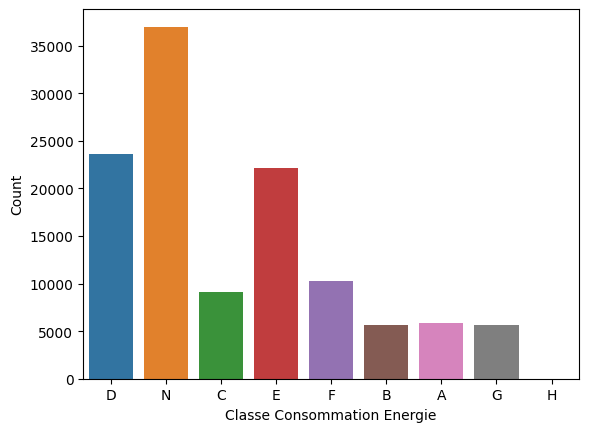

In [29]:
sns.countplot(x='classe_consommation_energie',hue='classe_consommation_energie',data = df)
# change the axes names
plt.xlabel('Classe Consommation Energie')
plt.ylabel('Count')
df['classe_consommation_energie'].value_counts()

You can see that we deal with an imbalanced dataset, where some classes have  almost 4 times more observations than others. 

In [30]:
df.describe()

,id,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,consommation_energie,estimation_ges,tr002_type_batiment_id,tr012_categorie_erp_id,tr013_type_erp_id,annee_construction,...,nombre_entrees_sans_sas,surface_baies_orientees_nord,surface_baies_orientees_est_ouest,surface_baies_orientees_sud,surface_planchers_hauts_deperditifs,surface_planchers_bas_deperditifs,surface_parois_verticales_opaques_deperditives,etat_avancement,dpe_vierge,est_efface
count,1.192590e+05,119259.000000,119259.000000,119259.000000,119259.000000,119259.000000,119259.000000,2663.000000,10297.000000,119259.000000,...,92690.000000,92849.000000,92849.000000,92849.000000,92849.000000,92849.000000,92849.000000,119259.0,112431.000000,119259.0
mean,4.215550e+06,9947.858350,5.773099,5.600181,181.800828,23.165315,2.219246,2.711228,18.793629,1903.878307,...,0.000022,1.596890,2.077123,1.510559,12.262475,12.156169,16.424162,1.0,0.349903,0.0
std,2.674530e+06,5331.386136,3.833524,4.430639,1225.091916,302.611182,0.656826,1.890199,7.665669,311.821718,...,0.004645,23.319382,29.959765,23.038831,62.001451,64.807030,165.889117,0.0,0.476941,0.0
min,2.200000e+02,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0
25%,1.874212e+06,5675.000000,3.000000,2.000000,0.000000,0.000000,2.000000,1.000000,12.000000,1947.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0
50%,4.058161e+06,9949.000000,3.000000,2.000000,162.340000,11.930000,2.000000,1.000000,23.000000,1947.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0
75%,6.362069e+06,14204.000000,10.000000,10.000000,270.000000,36.210000,2.000000,5.000000,23.000000,1970.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.0
max,9.431403e+06,22627.000000,16.000000,24.000000,358422.940000,84229.390000,5.000000,5.000000,30.000000,9809.000000,...,1.000000,3708.000000,1896.380000,1758.000000,4590.000000,4465.000000,17048.000000,1.0,1.000000,0.0


### Sample groups

In [31]:
# Distribution of groups in each class
group_class_counts = df.groupby(['classe_consommation_energie', 'id']).size().unstack(fill_value=0)
group_class_counts

id,220,248,328,377,856,983,1012,1073,1100,1270,...,9431022,9431127,9431145,9431235,9431308,9431353,9431395,9431396,9431398,9431403
classe_consommation_energie,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
D,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
E,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
H,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N,0,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


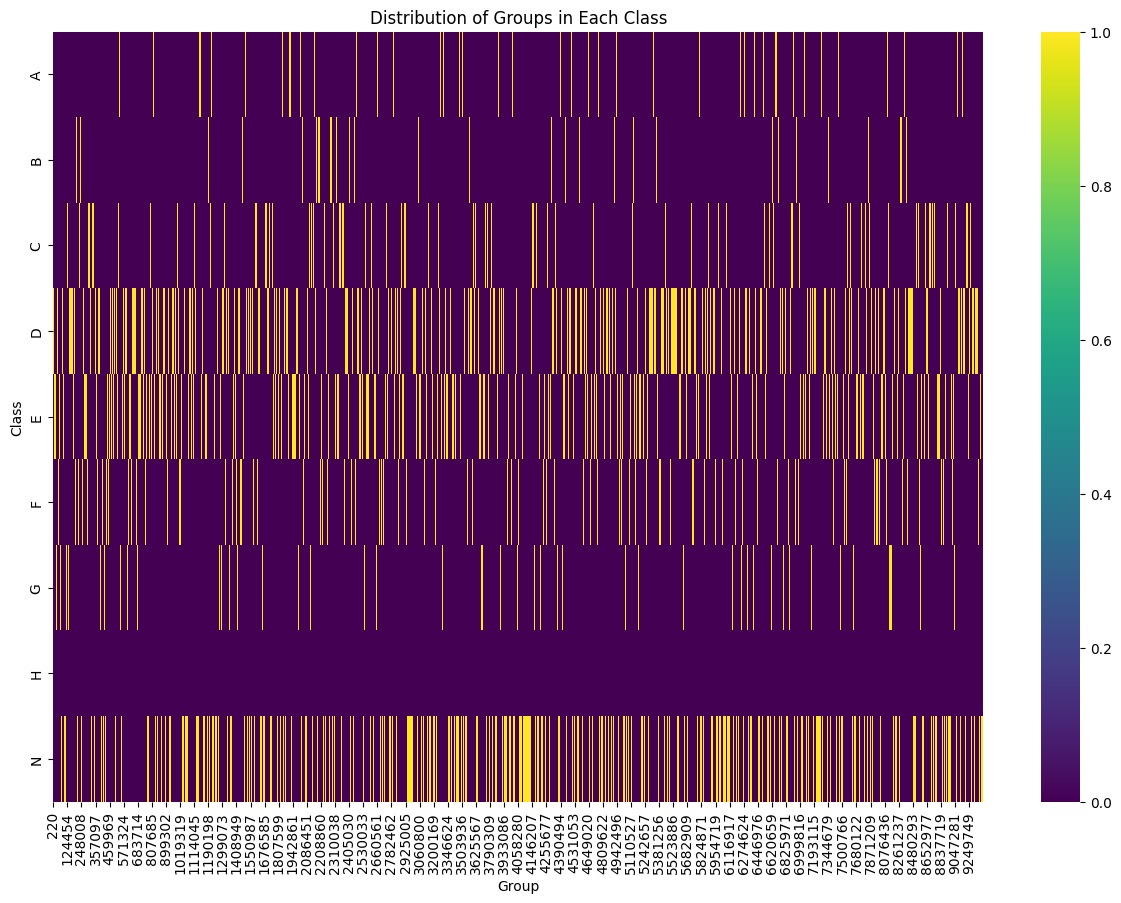

In [32]:
# heatmap of the distribution of groups in each class
plt.figure(figsize=(15, 10))
sns.heatmap(group_class_counts, cmap="viridis")
plt.title('Distribution of Groups in Each Class')
plt.xlabel('Group')
plt.ylabel('Class')
plt.show()

## Modèle de base pour établir un score de base, à surmonter.

Dans un premier temps, nous importons les données en utilisant la même méthodologie que celle qui sera utilisée dans problem.py, pour avoir une vraie perspective des données.

In [16]:
# Correspondance entre catégoriel et int8
int_to_cat = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
}
# Mapping categories to int
cat_to_int = {v: k for k, v in int_to_cat.items()}

target_column_name = 'classe_consommation_energie'

ignore_column_names = ['id', 'numero_dpe', 'version_methode_dpe',
                        'nom_methode_etude_thermique', 'version_methode_etude_thermique',
                        'commentaires_ameliorations_recommandations',
                        'explication_personnalisee', 'estimation_ges',
                        'classe_estimation_ges', 'nom_rue', 'numero_rue',
                        'batiment', 'escalier', 'etage', 'porte', 'numero_lot',
                        'partie_batiment', 'adresse_organisme_certificateur'
                        ]
dataSets = list()
for data in [train, test]:
    X_df = data.drop([target_column_name] + ignore_column_names, axis=1)
    # y_array = y_array.map(cat_to_int).fillna(-1).astype("int8").values
    y = np.array(data[target_column_name].map(cat_to_int).fillna(-1).astype("int8"))
    X = X_df
    dataSets.append(X)
    dataSets.append(y)
train_X, train_y, test_X, test_y = dataSets[0], dataSets[1], dataSets[2], dataSets[3]

In [17]:
print(train_X.shape, test_X.shape, test_X.shape, test_y.shape)
print(len(train_X.columns), len(test_X.columns))

(158750, 48) (65347, 48) (65347, 48) (65347,)
48 48


Puisque pour ```rampwf``` les matrices X et y doivent être ```np.arrays```, on extrait les indices de colonnes pour pouvoir les utiliser dans la construction du classificateur.

In [18]:
lista1 = list()
for i in ['code_postal', 'code_insee_commune']:
    lista1.append(list(train_X.columns).index(i))
print(lista1)

lista2 = list()
for i in ['portee_dpe_batiment', 'shon', 'surface_utile',
                                            'surface_thermique_parties_communes', 'en_souterrain', 'en_surface',
                                            'nombre_niveaux', 'nombre_circulations_verticales',
                                            'type_vitrage_verriere', 'surface_baies_orientees_nord',
                                            'surface_baies_orientees_est_ouest', 'surface_baies_orientees_sud',
                                            'surface_planchers_hauts_deperditifs',
                                            'surface_planchers_bas_deperditifs',
                                            'surface_parois_verticales_opaques_deperditives', 'etat_avancement',
                                            'dpe_vierge', 'est_efface']:
    lista2.append(list(train_X.columns).index(i))
print(lista2)

[19, 20]
[23, 24, 25, 26, 27, 28, 29, 30, 34, 37, 38, 39, 40, 41, 42, 43, 45, 46]


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin

class UniformingdType(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.astype(object)
        return X

class toStr(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.astype(str)
        return X


class Classifier(BaseEstimator):
    def __init__(self):
        # Definir les imputers et les scalers.
        qual_imputer = SimpleImputer(strategy="most_frequent")
        quant_imputer = SimpleImputer(strategy="mean")
        scaler = StandardScaler()

        # Transformations.
        qual_transform = Pipeline(steps=[
            ("previus", UniformingdType()),
            ("imputer", qual_imputer),
            ("toStr", toStr()),
            ("encoder", OneHotEncoder(handle_unknown='ignore'))
        ])

        quant_transform = Pipeline(steps=[
            ("imputer", quant_imputer),
            ("scaler", scaler)
        ])

        # ColumnTransformer para apliquer des transformations
        # differentes a les columnes.
        self.transformer = ColumnTransformer(
            transformers=[
                ("qual", qual_transform, [19, 20]),  
                ("quant", quant_transform, [23, 24, 25, 26, 27, 28, 29, 30, 34, 37, 38, 39, 40, 41, 42, 43, 45, 46]),  
            ],
            remainder='drop'  
        )

        # Definir le model de clasification.
        self.model = LogisticRegression(max_iter=1000, random_state=42)

        # Construction du pipeline complet.
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

    def predict_proba(self, X):
        return self.pipe.predict_proba(X)

In [20]:
classifier.pipe

NameError: name 'classifier' is not defined

: 

In [ ]:
!ramp-test --submission starting_kit

Testing Energetic class prediction for housing in Paris
Reading train and test files from ./data/ ...
./problem.py:55: DtypeWarning: Columns (23,24,25,36,39,49,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, 'data', f_name))
./problem.py:55: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, 'data', f_name))
./problem.py:55: DtypeWarning: Columns (23,24,25,36,39,49,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, 'data', f_name))
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  balanced acc    acc       time
	train          0.22  0.529  26.630766
	valid          0.21  0.521   0.632775
	test           0.22  0.539   0.249754
CV fold 1
	score  balanced acc    acc       time
	train          0.23  0.529  33.696432
	valid          0.22  0.524   

: 